In [1]:
#loading fashion_mnist data 
from tensorflow import keras
import numpy as np
import pandas as pd
from keras.datasets import fashion_mnist
import theano
from keras.layers.convolutional import Convolution2D
from keras.layers.core import Activation
import matplotlib.pyplot as plt
%matplotlib inline
#loading mnist data
(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.
/Users/Bodacious/anaconda3/envs/DeepLearning/lib/python3.6/site-packages/theano/configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


4423680/4422102 [==============================] - 13s 3us/step


In [2]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
# Normalizing the input
X_train= X_train.reshape(X_train.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_train/=255
X_test = X_test.reshape(X_test.shape[0],28,28,1)
X_test = X_test.astype('float32')
X_test/=255
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


There are 60000 training data and 10000 testing data
Number of occurence for each number in training data (0 stands for 10):
[[   0 6000]
 [   1 6000]
 [   2 6000]
 [   3 6000]
 [   4 6000]
 [   5 6000]
 [   6 6000]
 [   7 6000]
 [   8 6000]
 [   9 6000]]


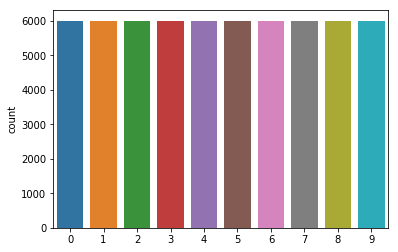

In [4]:
import seaborn as sns
print('There are', X_train.shape[0], 'training data and', X_test.shape[0], 'testing data')
print('Number of occurence for each number in training data (0 stands for 10):')
print(np.vstack((np.unique(y_train), np.bincount(y_train))).T)
sns.countplot(y_train)

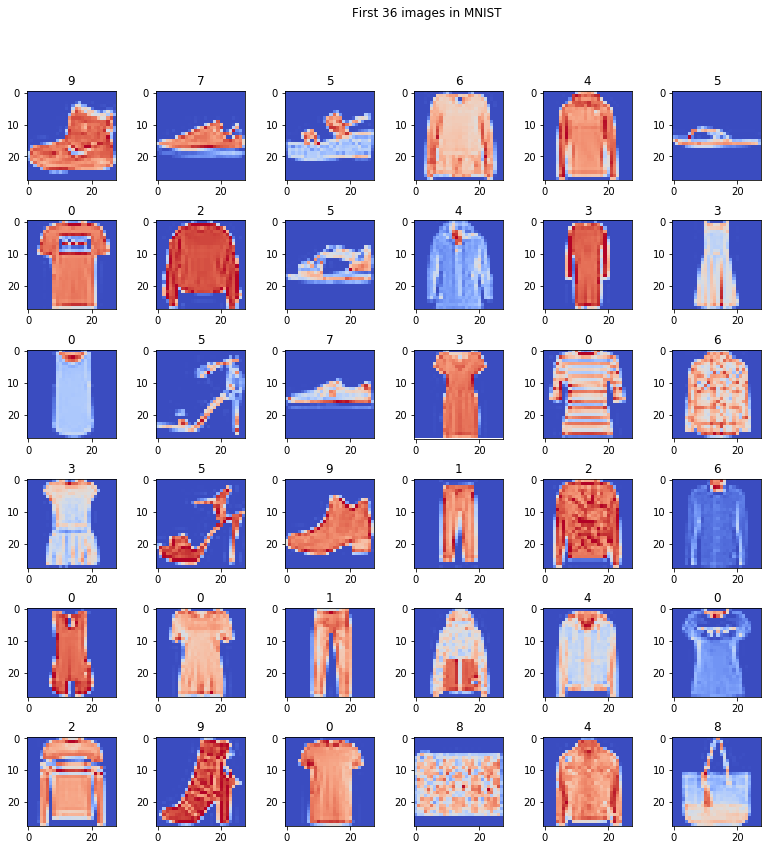

In [5]:
# plot first 36 images in MNIST
fig, ax = plt.subplots(6, 6, figsize = (12, 12))
fig.suptitle('First 36 images in MNIST')
fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
for x, y in [(i, j) for i in range(6) for j in range(6)]:
    ax[x, y].imshow(X_train[x + y * 6].reshape((28, 28)), cmap = 'coolwarm')
    ax[x, y].set_title(y_train[x + y * 6])

In [6]:
from  keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test= np_utils.to_categorical(y_test)
print(y_train[0])

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


In [7]:
from keras.models import Sequential
classifier = Sequential()

In [9]:
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten, MaxPool2D
from tensorflow.python.keras.layers import Conv2D, BatchNormalization

ActRelu = Activation('relu')
ActSoftmax = Activation('softmax')

FirstConv2DLayer = Conv2D(32, (3,3), input_shape=(28,28,1))
classifier.add(FirstConv2DLayer)
BatchNormalization(axis=-1) #Axis -1 is always features axis
classifier.add(ActRelu)
 
classifier.add(Conv2D(32, (3,3)))
BatchNormalization(axis=-1)
classifier.add(ActRelu)

classifier.add(MaxPool2D(pool_size=(2,2)))
BatchNormalization(axis=-1)
classifier.add(Conv2D(64, (3,3)))
BatchNormalization(axis=-1)
classifier.add(ActRelu)

classifier.add(Conv2D(64, (3,3)))
classifier.add(ActRelu)

classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Flatten())
BatchNormalization()
classifier.add(Dense(512))
BatchNormalization()
classifier.add(ActRelu)

classifier.add(Dropout(0.2))
classifier.add(Dense(10))
classifier.add(ActSoftmax)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    multiple                  0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
__________

In [11]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
from keras.preprocessing.image import ImageDataGenerator
# applying transformation to image
train_gen = ImageDataGenerator(rotation_range=8, 
                               width_shift_range=0.08, 
                               shear_range=0.3, 
                               height_shift_range=0.08, 
                               zoom_range=0.08 )
test_gen = ImageDataGenerator()

In [13]:
training_set= train_gen.flow(X_train, y_train, batch_size=64)
test_set= train_gen.flow(X_test, y_test, batch_size=64)

In [14]:
classifier_fashionMNSIT = classifier.fit_generator(training_set, 
                         steps_per_epoch=60000//64, 
                         validation_data= test_set, 
                         validation_steps=10000//64, 
                         epochs=25)

Instructions for updating:
Use tf.cast instead.
Epoch 1/25
937/937 [==============================] - 86s 92ms/step - loss: 0.6166 - acc: 0.7642 - val_loss: 0.4736 - val_acc: 0.8211
Epoch 2/25
937/937 [==============================] - 84s 90ms/step - loss: 0.4092 - acc: 0.8454 - val_loss: 0.3877 - val_acc: 0.8570
Epoch 3/25
937/937 [==============================] - 84s 90ms/step - loss: 0.3460 - acc: 0.8702 - val_loss: 0.3521 - val_acc: 0.8659
Epoch 4/25
937/937 [==============================] - 83s 89ms/step - loss: 0.3178 - acc: 0.8817 - val_loss: 0.3272 - val_acc: 0.8795
Epoch 5/25
937/937 [==============================] - 85s 90ms/step - loss: 0.2982 - acc: 0.8893 - val_loss: 0.3097 - val_acc: 0.8855
Epoch 6/25
937/937 [==============================] - 83s 89ms/step - loss: 0.2815 - acc: 0.8946 - val_loss: 0.2983 - val_acc: 0.8883
Epoch 7/25
937/937 [==============================] - 84s 89ms/step - loss: 0.2724 - acc: 0.8994 - val_loss: 0.2809 - val_acc: 0.8959
Epoch 8/25
937

In [15]:
classifier.layers[0].get_weights()[0]

array([[[[ -1.35703295e-01,   1.42084241e-01,   1.47637665e-01,
           -2.33620349e-02,   1.45736098e-01,  -2.74162382e-01,
            5.60416393e-02,  -1.06639206e-01,  -1.04065466e+00,
           -4.21830267e-03,   3.66758704e-01,  -7.38243982e-02,
            6.42651096e-02,   1.32894114e-01,  -2.03384876e-01,
            1.06749795e-01,   3.74768190e-02,  -2.87588567e-01,
           -1.68522775e-01,  -4.51678485e-02,  -3.35365623e-01,
           -7.11978301e-02,   8.29364508e-02,  -2.51846075e-01,
            1.00097515e-01,   8.54382962e-02,   4.72483523e-02,
            3.38137507e-01,   1.73671633e-01,  -3.27443779e-02,
            5.49978949e-02,   6.96484670e-02]],

        [[ -6.68650791e-02,   6.61111325e-02,   1.71216309e-01,
            5.42772375e-02,  -3.55878651e-01,  -6.69808686e-02,
            2.14083437e-02,   2.82509327e-01,  -1.36360273e-01,
           -1.56941757e-01,  -4.46322858e-02,   5.19961379e-02,
           -6.13880455e-02,   1.75155059e-01,  -5.10065

In [16]:
for i in range(len(classifier.get_weights())):
    print(i, "\t", len(classifier.get_weights()[i]), "\t", classifier.layers[i])

0 	 3 	 <keras.layers.convolutional.Conv2D object at 0x1c453fd898>
1 	 32 	 <keras.layers.core.Activation object at 0x1c453f40b8>
2 	 3 	 <keras.layers.convolutional.Conv2D object at 0x1c44c08f28>
3 	 32 	 <keras.layers.pooling.MaxPooling2D object at 0x1c454e8668>
4 	 3 	 <keras.layers.convolutional.Conv2D object at 0x1c454849b0>
5 	 64 	 <keras.layers.convolutional.Conv2D object at 0x1c454ba898>
6 	 3 	 <keras.layers.pooling.MaxPooling2D object at 0x1c455793c8>
7 	 64 	 <keras.layers.core.Flatten object at 0x1c45540860>
8 	 1024 	 <keras.layers.core.Dense object at 0x1c45ba80b8>
9 	 512 	 <keras.layers.core.Dropout object at 0x1c45ba8630>
10 	 512 	 <keras.layers.core.Dense object at 0x1c45579dd8>
11 	 10 	 <keras.layers.core.Activation object at 0x1c45360780>


In [17]:
for layer in classifier.layers:
    print(layer.name, "\n", layer.get_weights())

conv2d_1 
 [array([[[[ -1.35703295e-01,   1.42084241e-01,   1.47637665e-01,
           -2.33620349e-02,   1.45736098e-01,  -2.74162382e-01,
            5.60416393e-02,  -1.06639206e-01,  -1.04065466e+00,
           -4.21830267e-03,   3.66758704e-01,  -7.38243982e-02,
            6.42651096e-02,   1.32894114e-01,  -2.03384876e-01,
            1.06749795e-01,   3.74768190e-02,  -2.87588567e-01,
           -1.68522775e-01,  -4.51678485e-02,  -3.35365623e-01,
           -7.11978301e-02,   8.29364508e-02,  -2.51846075e-01,
            1.00097515e-01,   8.54382962e-02,   4.72483523e-02,
            3.38137507e-01,   1.73671633e-01,  -3.27443779e-02,
            5.49978949e-02,   6.96484670e-02]],

        [[ -6.68650791e-02,   6.61111325e-02,   1.71216309e-01,
            5.42772375e-02,  -3.55878651e-01,  -6.69808686e-02,
            2.14083437e-02,   2.82509327e-01,  -1.36360273e-01,
           -1.56941757e-01,  -4.46322858e-02,   5.19961379e-02,
           -6.13880455e-02,   1.75155059e-0

In [18]:
# Visualizating filters
from keras import backend as K
K.set_learning_phase(1)
import tensorflow as tf
layer_dict = dict([(layer.name, layer) for layer in classifier.layers])
#print('Layer dict', layer_dict)
print(classifier.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    multiple                  0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
__________

In [19]:
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.05
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.05

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [20]:
def ImageVisuals_in_filter_coolwarm(img = np.array(X_train[0]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_2'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, classifier.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([classifier.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'coolwarm')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'coolwarm')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

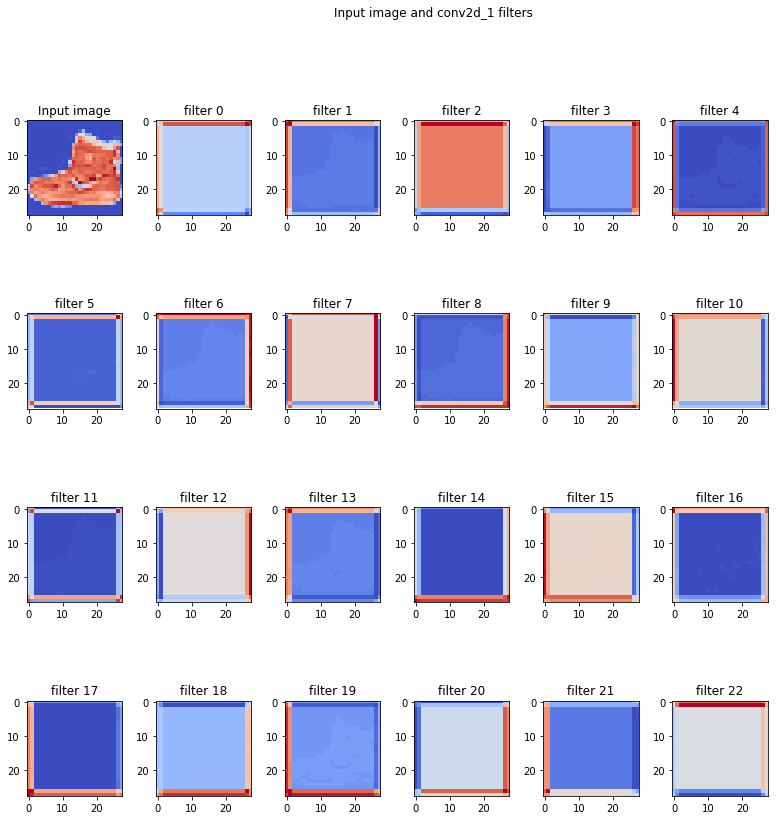

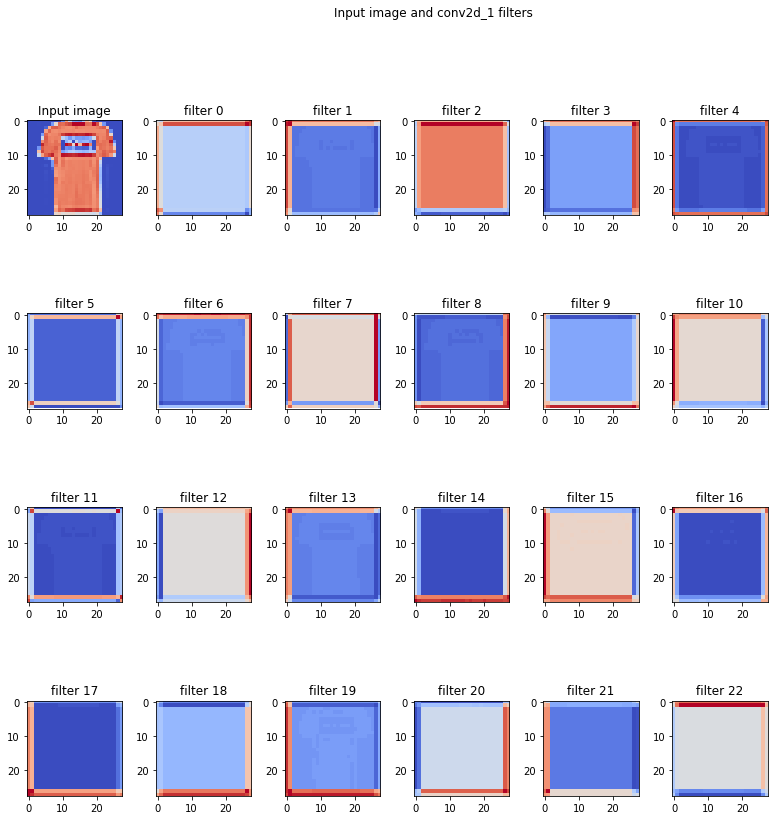

In [21]:
for i in (0,1):
    ImageVisuals_in_filter_coolwarm(np.array(X_train[i]).reshape((1, 28, 28, 1)).astype(np.float64),'conv2d_1')

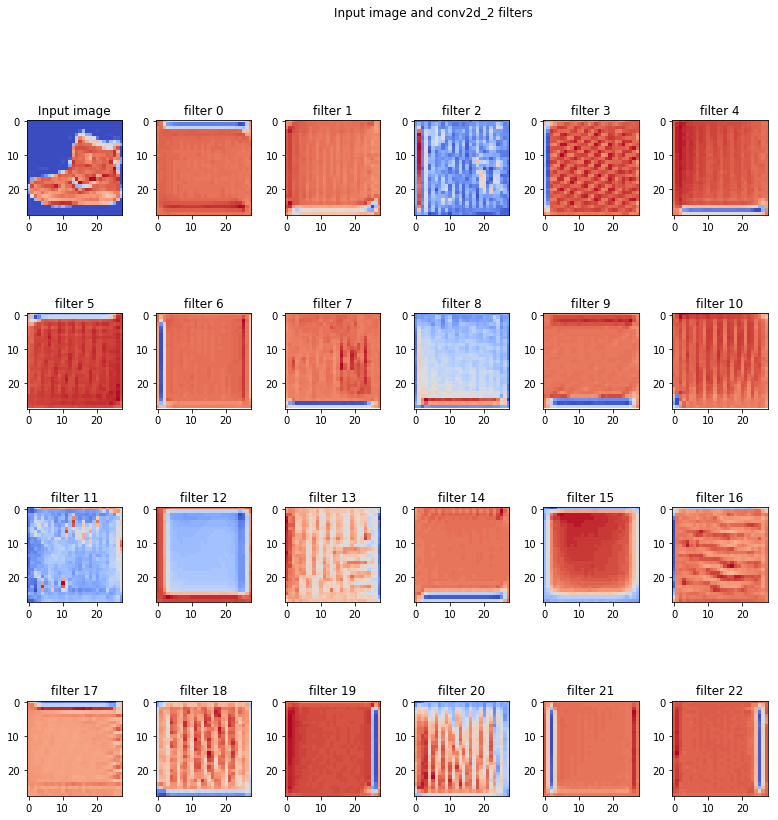

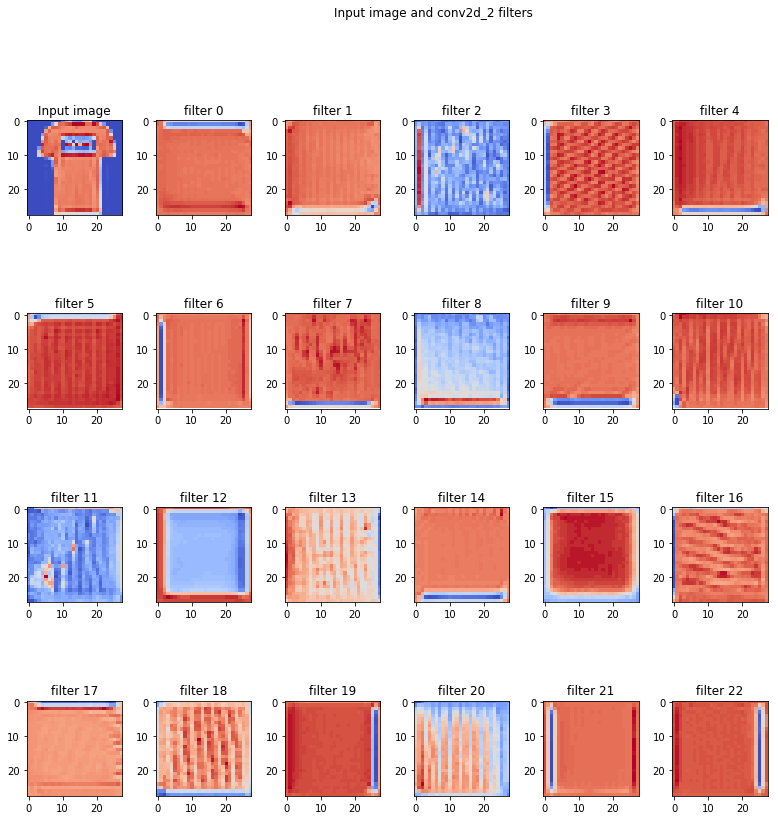

In [22]:
for i in (0,1):
    ImageVisuals_in_filter_coolwarm(np.array(X_train[i]).reshape((1, 28, 28, 1)).astype(np.float64),'conv2d_2')

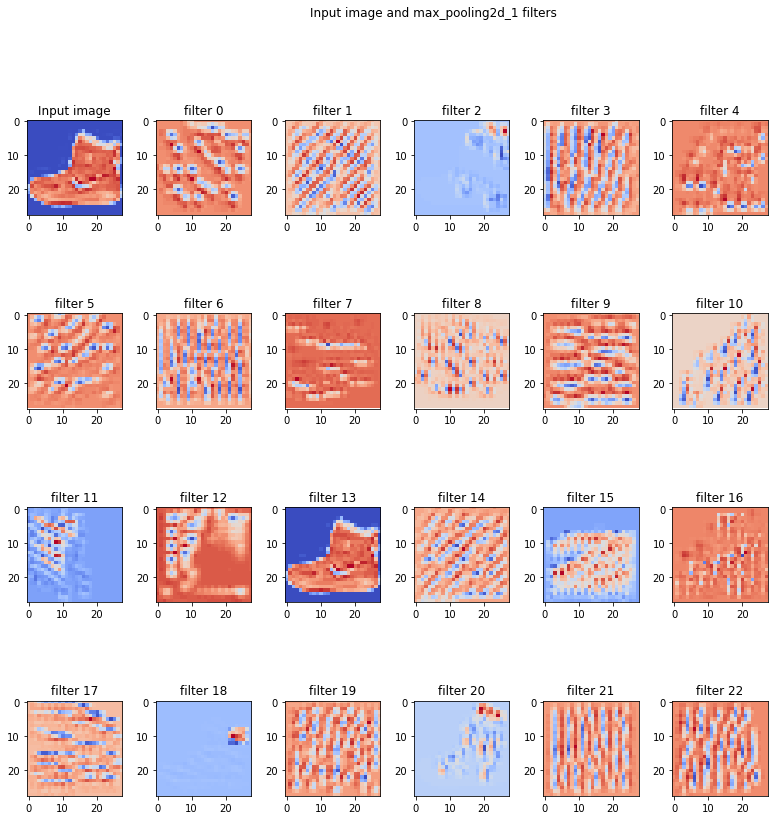

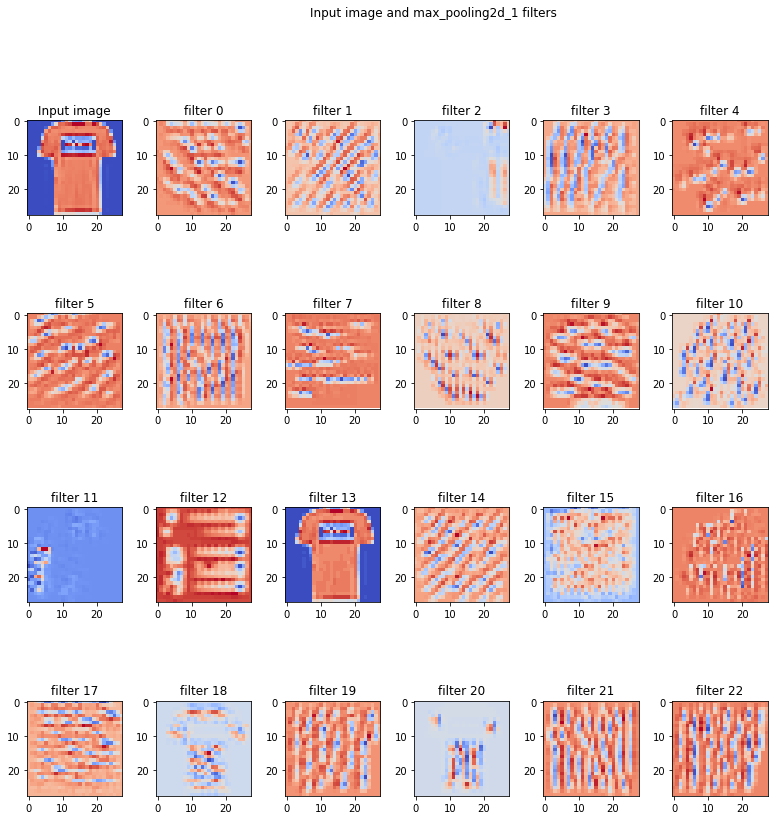

In [23]:
for i in (0,1):
    ImageVisuals_in_filter_coolwarm(np.array(X_train[i]).reshape((1, 28, 28, 1)).astype(np.float64),'max_pooling2d_1')

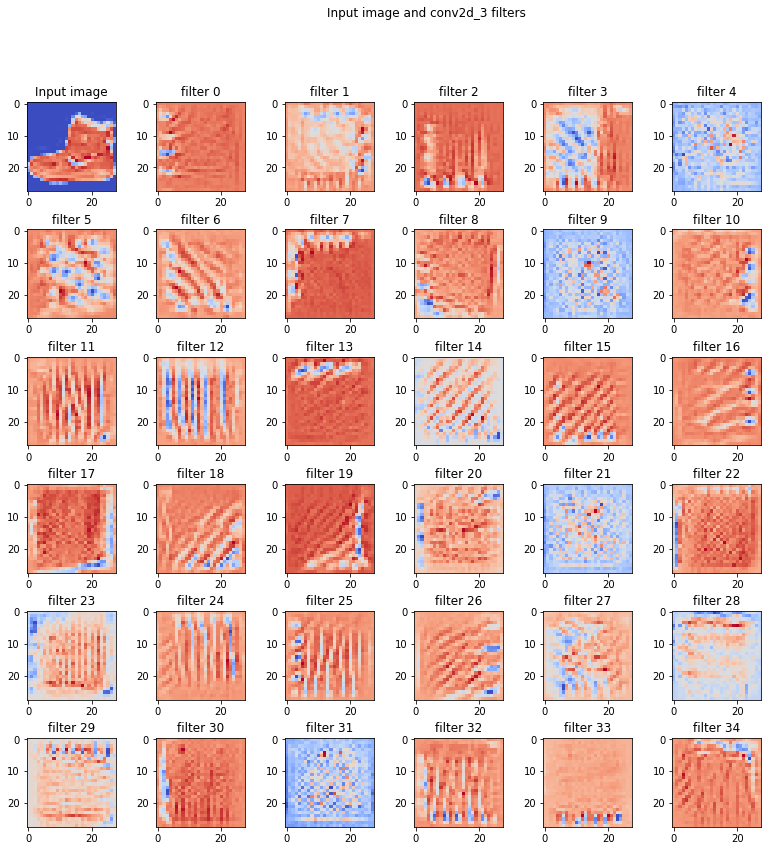

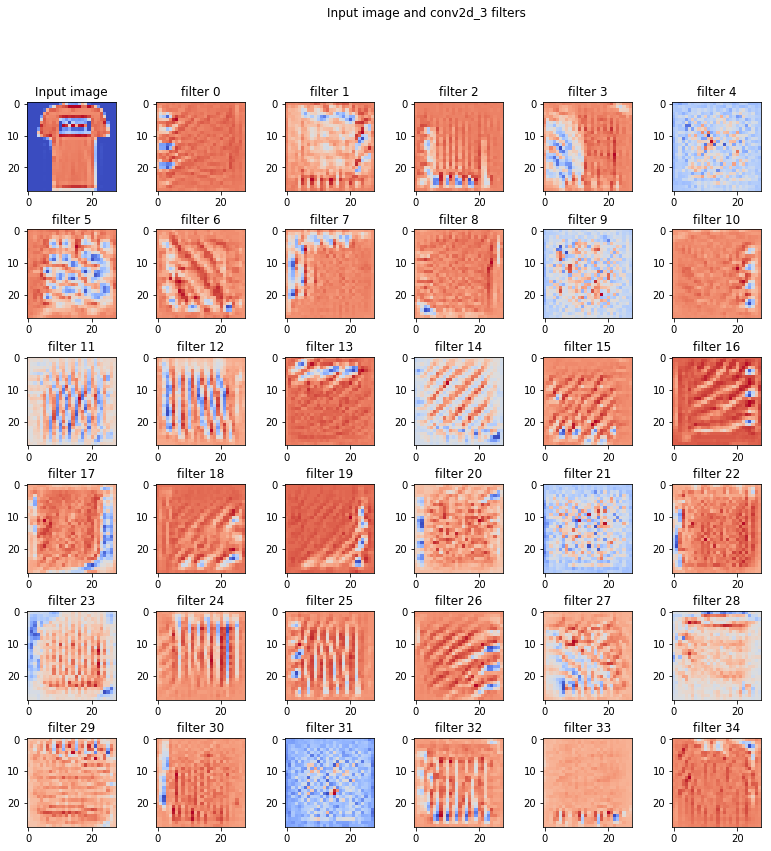

In [24]:
for i in (0,1):
    ImageVisuals_in_filter_coolwarm(np.array(X_train[i]).reshape((1, 28, 28, 1)).astype(np.float64),'conv2d_3')

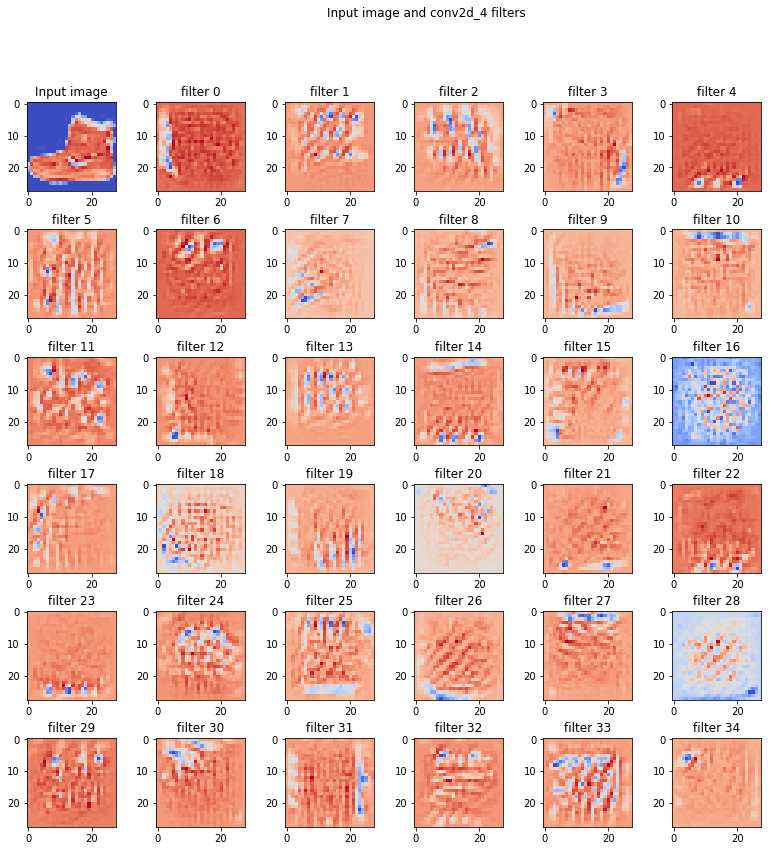

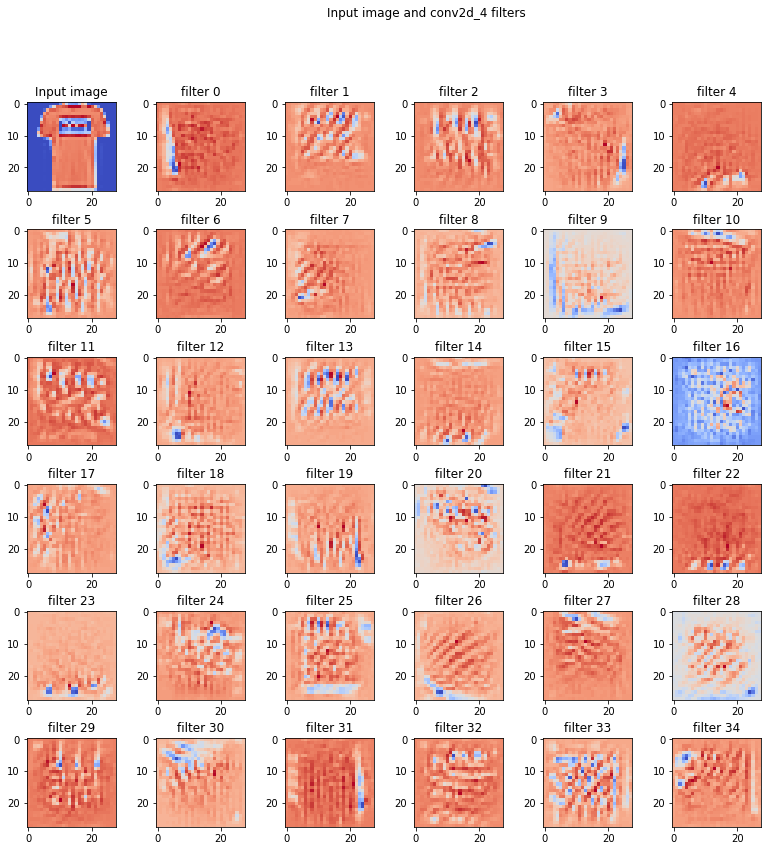

In [25]:
for i in (0,1):
    ImageVisuals_in_filter_coolwarm(np.array(X_train[i]).reshape((1, 28, 28, 1)).astype(np.float64),'conv2d_4')

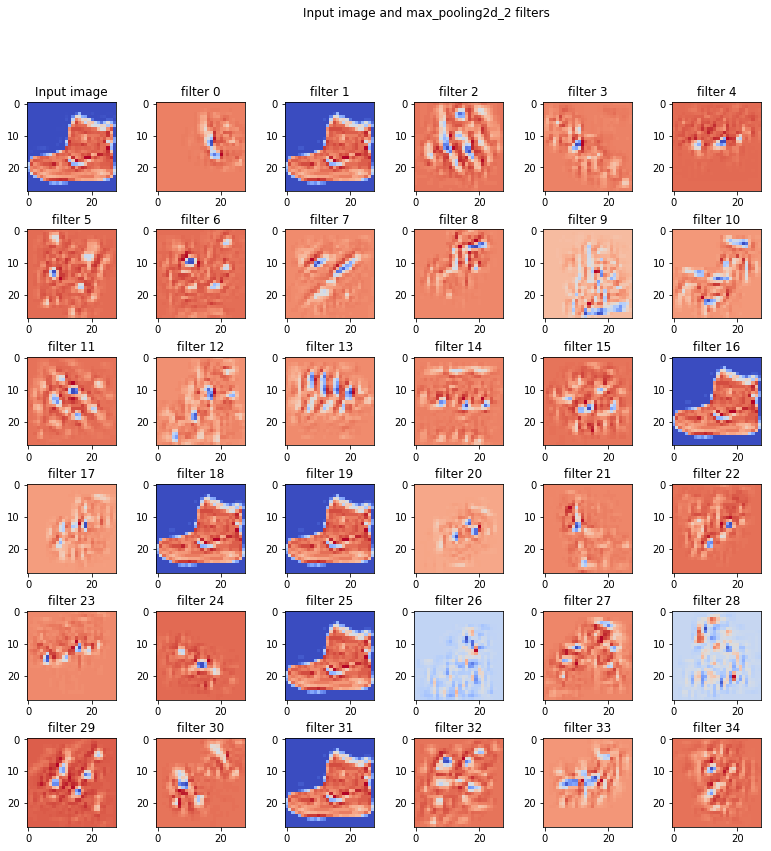

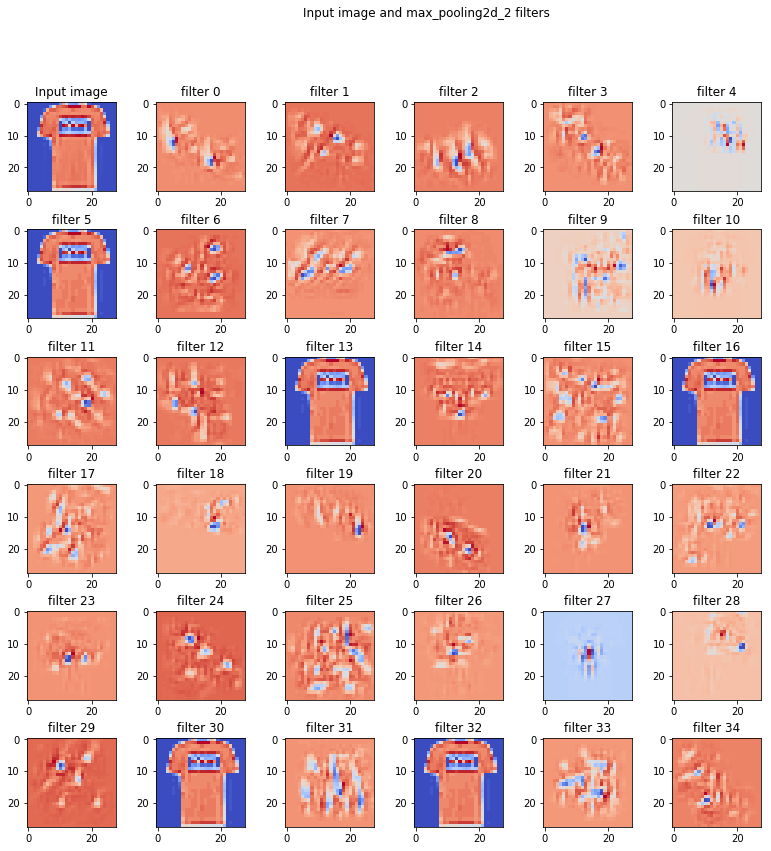

In [26]:
for i in (0,1):
    ImageVisuals_in_filter_coolwarm(np.array(X_train[i]).reshape((1, 28, 28, 1)).astype(np.float64),'max_pooling2d_2')

In [27]:
y_pred = classifier.predict(X_test)

In [29]:
def decode_categorical_actualval(datanum):
    return [np.argmax(y, axis=None, out=None) for y in datanum]

In [30]:
y_real_afterdecode = decode_categorical_actualval(y_test)
y_real_afterdecode

[9,
 2,
 1,
 1,
 6,
 1,
 4,
 6,
 5,
 7,
 4,
 5,
 7,
 3,
 4,
 1,
 2,
 4,
 8,
 0,
 2,
 5,
 7,
 9,
 1,
 4,
 6,
 0,
 9,
 3,
 8,
 8,
 3,
 3,
 8,
 0,
 7,
 5,
 7,
 9,
 6,
 1,
 3,
 7,
 6,
 7,
 2,
 1,
 2,
 2,
 4,
 4,
 5,
 8,
 2,
 2,
 8,
 4,
 8,
 0,
 7,
 7,
 8,
 5,
 1,
 1,
 2,
 3,
 9,
 8,
 7,
 0,
 2,
 6,
 2,
 3,
 1,
 2,
 8,
 4,
 1,
 8,
 5,
 9,
 5,
 0,
 3,
 2,
 0,
 6,
 5,
 3,
 6,
 7,
 1,
 8,
 0,
 1,
 4,
 2,
 3,
 6,
 7,
 2,
 7,
 8,
 5,
 9,
 9,
 4,
 2,
 5,
 7,
 0,
 5,
 2,
 8,
 6,
 7,
 8,
 0,
 0,
 9,
 9,
 3,
 0,
 8,
 4,
 1,
 5,
 4,
 1,
 9,
 1,
 8,
 6,
 2,
 1,
 2,
 5,
 1,
 0,
 0,
 0,
 1,
 6,
 1,
 6,
 2,
 2,
 4,
 4,
 1,
 4,
 5,
 0,
 4,
 7,
 9,
 3,
 7,
 2,
 3,
 9,
 0,
 9,
 4,
 7,
 4,
 2,
 0,
 5,
 2,
 1,
 2,
 1,
 3,
 0,
 9,
 1,
 0,
 9,
 3,
 6,
 7,
 9,
 9,
 4,
 4,
 7,
 1,
 2,
 1,
 6,
 3,
 2,
 8,
 3,
 6,
 1,
 1,
 0,
 2,
 9,
 2,
 4,
 0,
 7,
 9,
 8,
 4,
 1,
 8,
 4,
 1,
 3,
 1,
 6,
 7,
 2,
 8,
 5,
 2,
 0,
 7,
 7,
 6,
 2,
 7,
 0,
 7,
 8,
 9,
 2,
 9,
 0,
 5,
 1,
 4,
 4,
 5,
 6,
 9,
 2,
 6,
 8,
 6,
 4,
 2,
 2,


In [31]:
y_predict_afterdecode = decode_categorical_actualval(y_pred)
y_predict_afterdecode

[9,
 2,
 1,
 1,
 6,
 1,
 4,
 6,
 5,
 7,
 4,
 5,
 5,
 3,
 4,
 1,
 2,
 4,
 8,
 0,
 2,
 5,
 7,
 5,
 1,
 2,
 6,
 0,
 9,
 3,
 8,
 8,
 3,
 3,
 8,
 0,
 7,
 5,
 7,
 9,
 6,
 1,
 6,
 9,
 6,
 7,
 2,
 1,
 2,
 6,
 4,
 4,
 5,
 8,
 2,
 2,
 8,
 4,
 8,
 0,
 7,
 7,
 8,
 5,
 1,
 1,
 2,
 3,
 7,
 8,
 7,
 0,
 2,
 6,
 2,
 3,
 1,
 2,
 8,
 4,
 1,
 8,
 5,
 9,
 5,
 0,
 3,
 2,
 0,
 6,
 5,
 3,
 6,
 7,
 1,
 8,
 0,
 1,
 2,
 2,
 3,
 6,
 7,
 2,
 7,
 8,
 5,
 9,
 9,
 4,
 2,
 5,
 7,
 0,
 5,
 2,
 8,
 6,
 5,
 8,
 0,
 0,
 9,
 9,
 3,
 0,
 8,
 4,
 1,
 5,
 4,
 1,
 9,
 1,
 8,
 6,
 2,
 1,
 2,
 5,
 1,
 0,
 0,
 0,
 1,
 6,
 1,
 3,
 2,
 2,
 4,
 4,
 1,
 4,
 5,
 0,
 4,
 7,
 9,
 3,
 7,
 2,
 3,
 9,
 0,
 9,
 4,
 7,
 4,
 2,
 6,
 5,
 2,
 1,
 2,
 1,
 3,
 0,
 9,
 1,
 0,
 9,
 3,
 6,
 7,
 9,
 9,
 4,
 4,
 7,
 1,
 2,
 1,
 6,
 3,
 2,
 8,
 3,
 6,
 1,
 1,
 0,
 2,
 9,
 2,
 4,
 0,
 7,
 9,
 8,
 4,
 1,
 8,
 4,
 1,
 3,
 1,
 4,
 7,
 2,
 8,
 5,
 2,
 0,
 7,
 7,
 6,
 2,
 7,
 0,
 7,
 8,
 9,
 2,
 9,
 0,
 5,
 1,
 4,
 4,
 5,
 4,
 9,
 2,
 2,
 8,
 6,
 4,
 2,
 2,


Text(0.5,13.4211,'Predicted label')

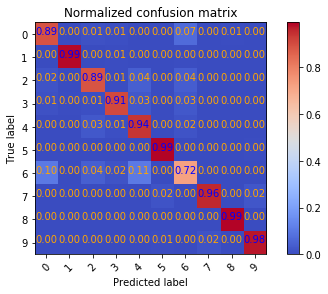

In [32]:
from sklearn.metrics import confusion_matrix
import itertools
n_classes = 10
cm = confusion_matrix(y_real_afterdecode, y_predict_afterdecode)
cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
plt.imshow(cm, cmap = 'coolwarm')
plt.title('Normalized confusion matrix')
plt.colorbar()
tick_marks = np.arange(n_classes)
plt.xticks(tick_marks, np.arange(n_classes), rotation=45)
plt.yticks(tick_marks, np.arange(n_classes))

fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="blue" if cm[i, j] > thresh else "orange")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

#### Label Description
###### 0 T-shirt/top ;  1 Trouser  ; 2 Pullover ; 3 Dress ; 4 Coat ; 5 Sandal ; 6 Shirt ; 7 Sneaker ; 8 Bag ; 9 Ankle boot

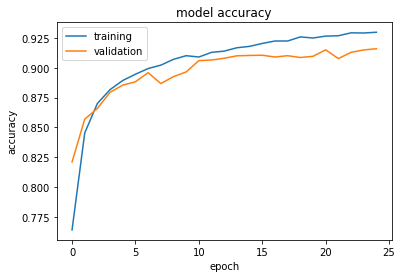

In [33]:
plt.plot(classifier_fashionMNSIT.history['acc'])
plt.plot(classifier_fashionMNSIT.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

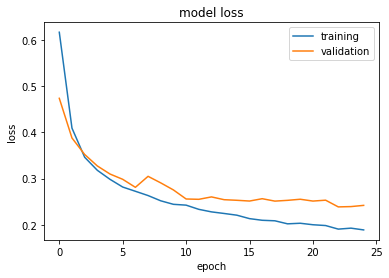

In [34]:
plt.plot(classifier_fashionMNSIT.history['loss'])
plt.plot(classifier_fashionMNSIT.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()